In [3]:
import mne
import pandas as pd
import numpy as np
from mne.time_frequency import psd_array_multitaper
%matplotlib widget

In [7]:
raw_sample_1 = mne.io.read_raw_edf('../eeg_data/main_edf/1164.edf',preload=True,infer_types=False)
cleaned_sample_1 = mne.io.read_raw_eeglab('../eeg_data/main_set_cleaned/1164.set',preload=True)


Extracting EDF parameters from c:\Users\kylek\Dropbox (Partners HealthCare)\eeg_asd_project\eeg_data\main_edf\1164.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 74495  =      0.000 ...   290.996 secs...


C:\Users\kylek\AppData\Local\Temp/ipykernel_116664/1343335496.py:2: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  cleaned_sample_1 = mne.io.read_raw_eeglab('../eeg_data/main_set_cleaned/1164.set',preload=True)
C:\Users\kylek\AppData\Local\Temp/ipykernel_116664/1343335496.py:2: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  cleaned_sample_1 = mne.io.read_raw_eeglab('../eeg_data/main_set_cleaned/1164.set',preload=True)


In [8]:
raw_sample_1.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2020-05-17 16:50:28 UTC
 nchan: 21
 projs: []
 sfreq: 256.0 Hz
>

## Time domain plot

Using matplotlib as 2D backend.


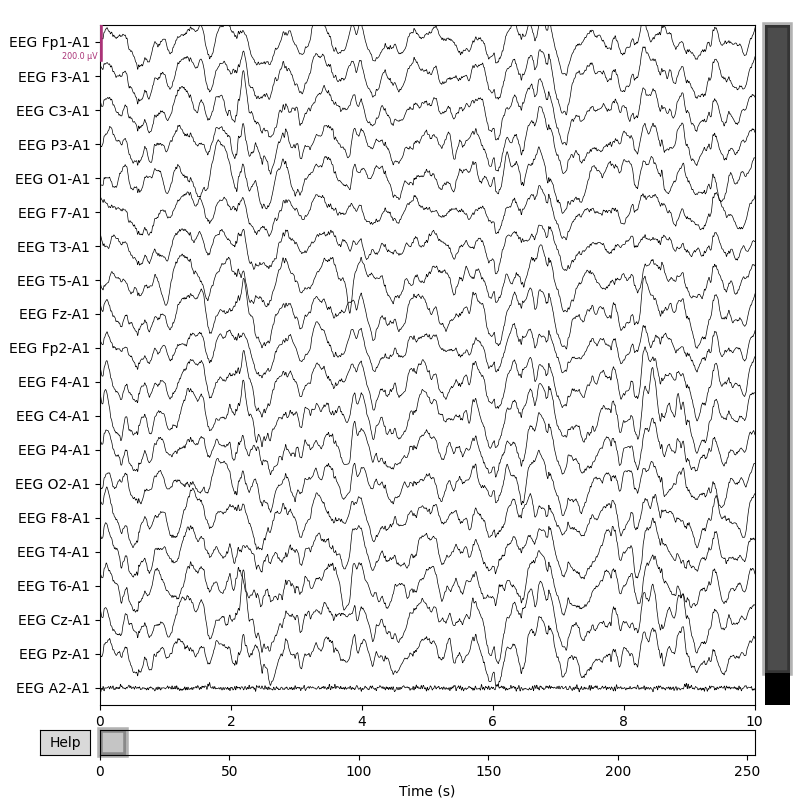

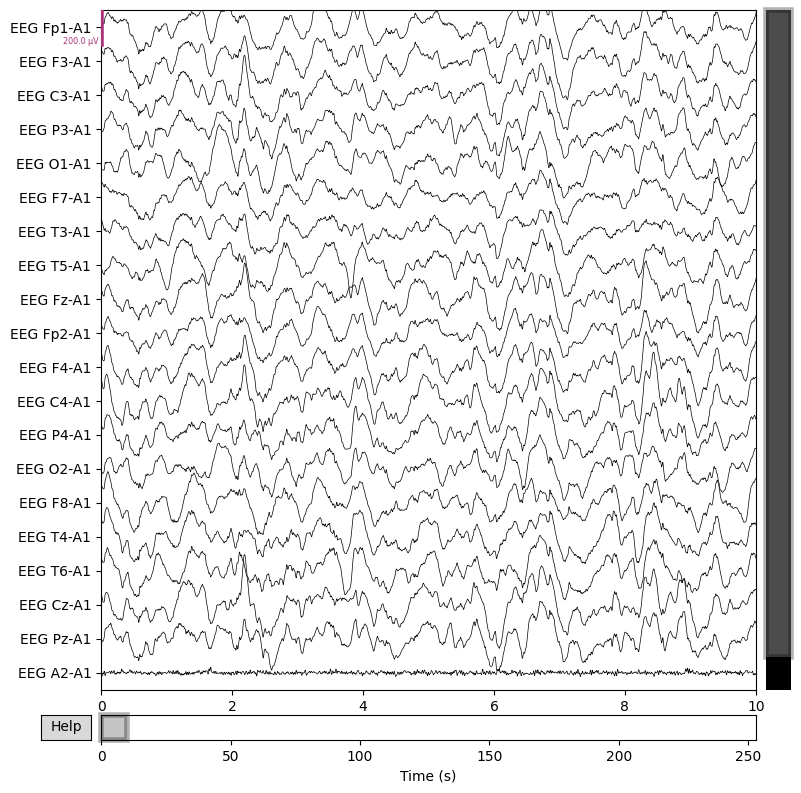

In [4]:
scaling_dict = dict(mag=1e-12, grad=4e-11, eeg=10e-5)


channel_renaming_dict = {name: name.replace('-LE', '-A1')
                         for name in raw_sample_1.ch_names}
raw_sample_1.rename_channels(mapping=channel_renaming_dict)

raw_sample_1.plot(duration=10,show_scrollbars=True,scalings=scaling_dict)

## Power Spectral Density

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


C:\Users\kylek\AppData\Local\Temp/ipykernel_116664/3301756531.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_sample_1.plot_psd()


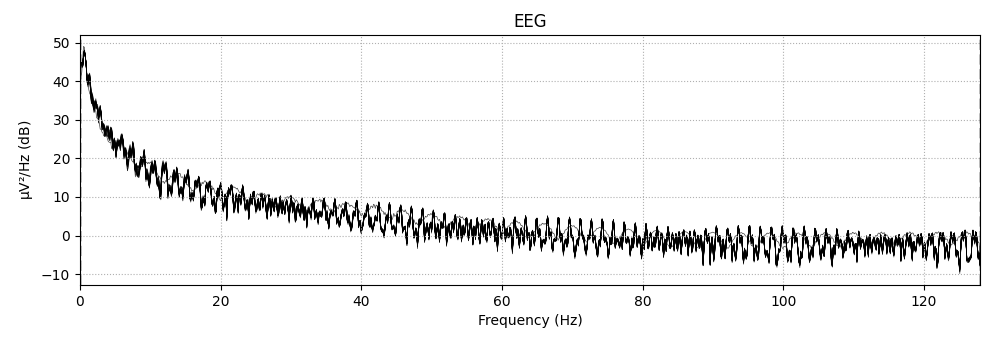

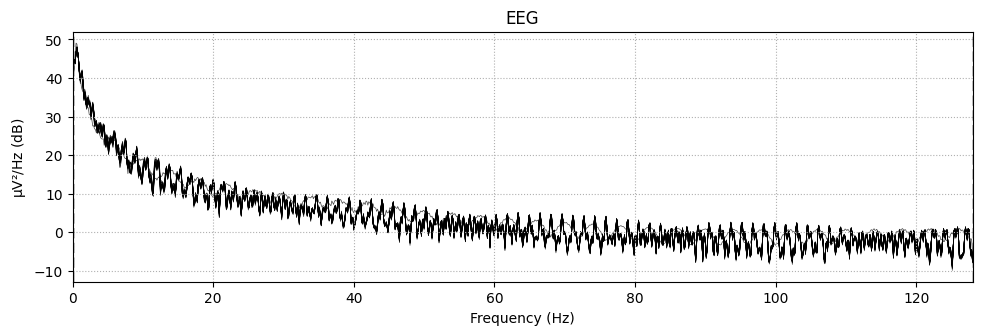

In [5]:
raw_sample_1.plot_psd()

## Multitaper PSD


Not setting metadata
145 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 145 events and 512 original time points ...
0 bad epochs dropped
Applying baseline correction (mode: mean)


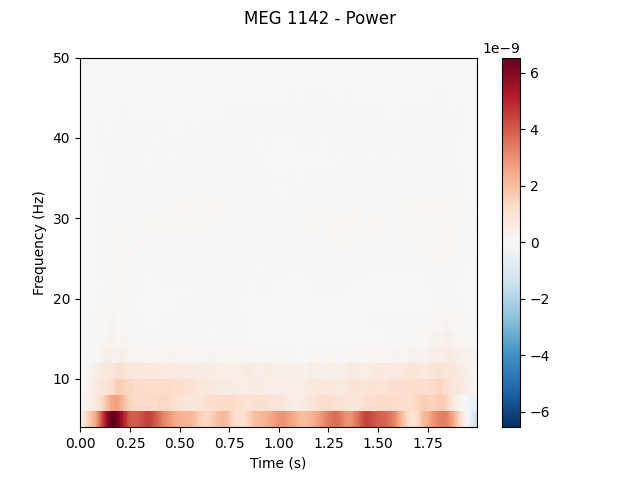

No baseline correction applied


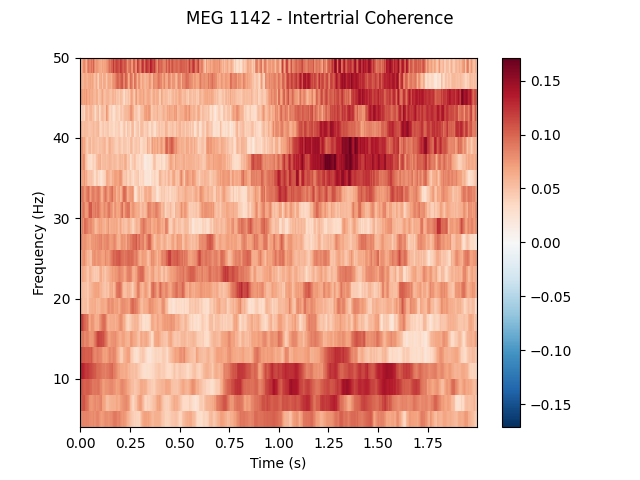

[<Figure size 640x480 with 2 Axes>]

In [4]:
from mne.time_frequency import tfr_multitaper
epochs = mne.make_fixed_length_epochs(raw_sample_1, duration=2, preload=True)


freqs = np.arange(5., 50., 2.)  # define frequencies of interest
n_cycles = freqs / 2.  # 0.5 second time windows for all frequencies

# Choose time x (full) bandwidth product
time_bandwidth = 4.0  # With 0.5 s time windows, this gives 8 Hz smoothing

power, itc = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                            use_fft=True, time_bandwidth=time_bandwidth,
                            return_itc=True, n_jobs=1)

# Plot results (with baseline correction only for power)
power.plot([0], baseline=(-0.5, 0), mode='mean', title='MEG 1142 - Power')
itc.plot([0], title='MEG 1142 - Intertrial Coherence')


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


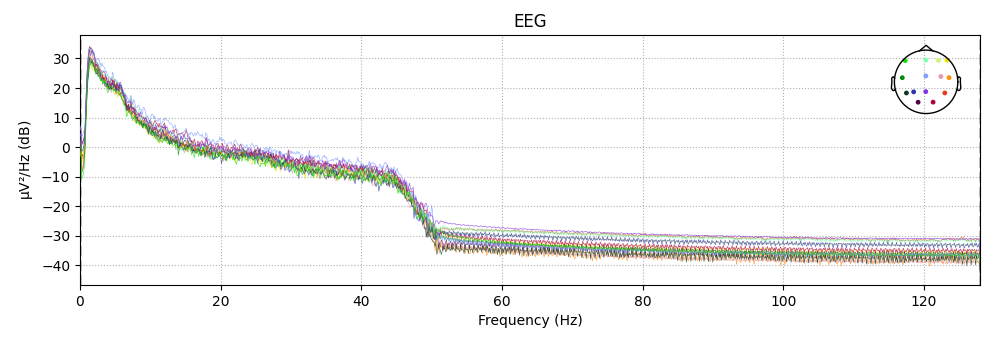

In [13]:
cleaned_sample_1.set_montage('standard_1020')
cleaned_sample_1.plot_psd()


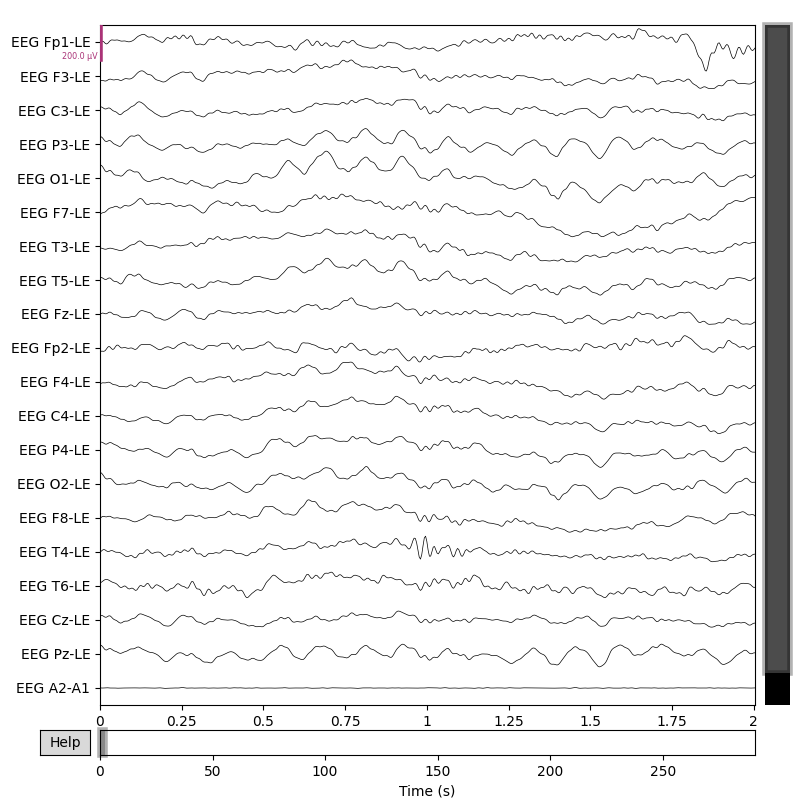

In [17]:
raw_sample_1.plot(duration=2,show_scrollbars=True,scalings={'eeg':10e-5})

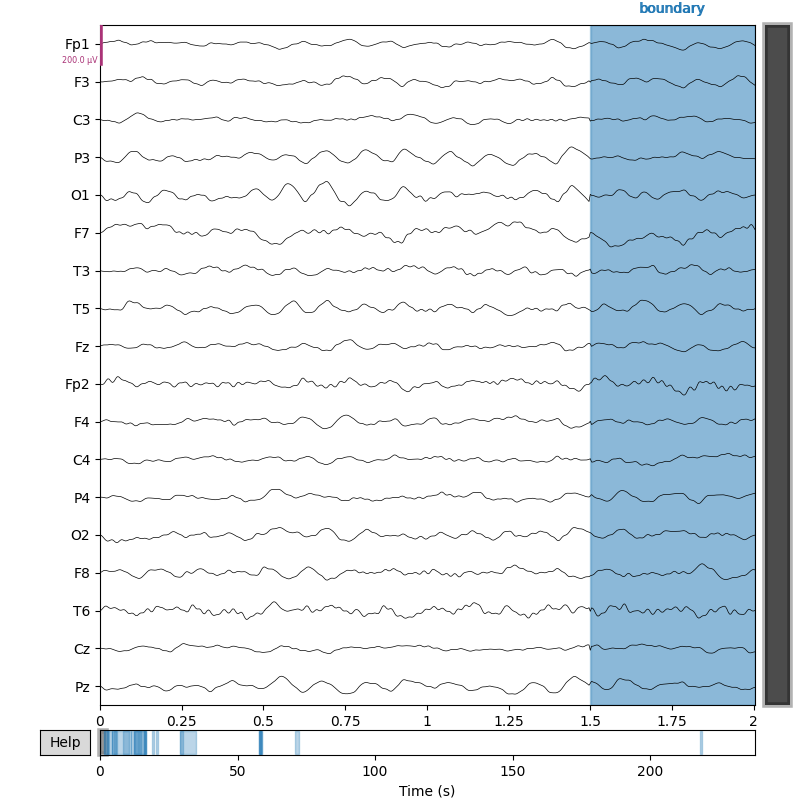

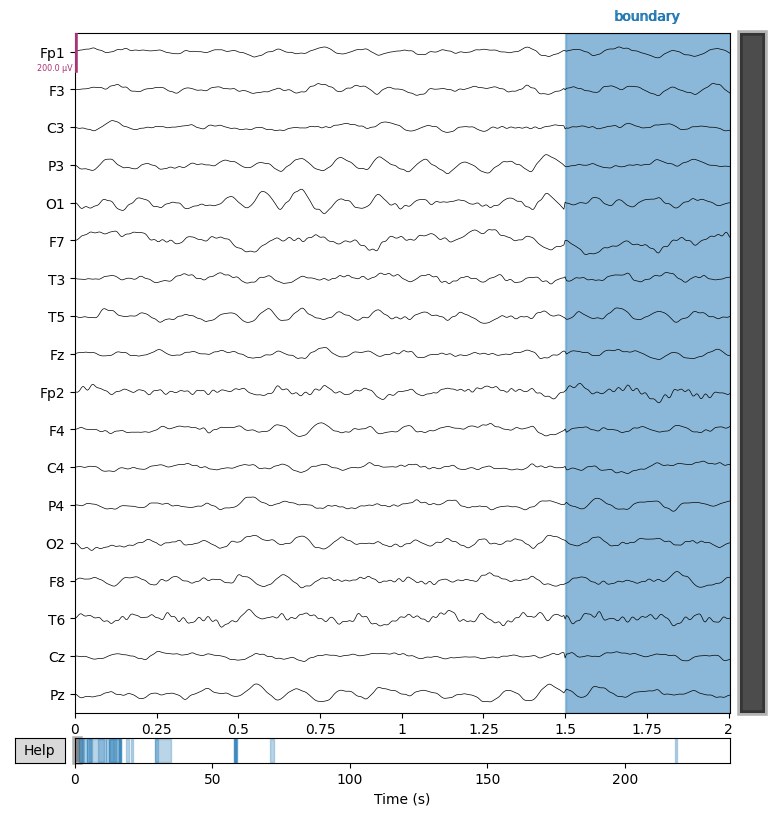

In [18]:
cleaned_sample_1.plot(duration=2,show_scrollbars=True,scalings={'eeg':10e-5})

In [10]:
import os.path as op
import os
import numpy as np
import matplotlib.pyplot as plt
#import openneuro
import mne
#import autoreject
#from mne.time_frequency import psd_welch
import pandas as pd
from os import listdir
from os.path import isfile, join



########### This is sanity check #################
# read in edf file
raw = mne.io.read_raw_edf('../eeg_data/main_edf/001.edf', infer_types=True, preload=True, misc=['Status'])

# Step 1
# fix channel names
raw.ch_names
channel_renaming_dict = {name: name.replace('-LE', '-A1')
                         for name in raw.ch_names}
raw.rename_channels(mapping=channel_renaming_dict)
channel_renaming_dict = {name: name.replace('-A1', '')
                         for name in raw.ch_names}
                         
raw.rename_channels(mapping=channel_renaming_dict)
raw.ch_names

# keep only EEG channels and apply montage
raw.pick_types(eeg=True)
# Original Montages
raw.set_montage('standard_1020')
#raw.set_eeg_reference(ref_channels='average')



#remove A2
raw.drop_channels('A2')
raw.filter(l_freq=0.5, h_freq=42)


# plots
#raw.plot_sensors(show_names=True)# check raw data and psd
raw.plot(scalings={'eeg':10e-5})
raw.plot_psd()
# make 2-second epochs
#epochs = mne.make_fixed_length_epochs(raw, duration=2, preload=True)
#epochs.plot_psd()
# plot the data
#epochs.average().detrend().plot_joint()


Extracting EDF parameters from c:\Users\kylek\Dropbox (Partners HealthCare)\eeg_asd_project\eeg_data\main_edf\001.edf...
EDF file detected
Channel 'EEG Fp1-LE' recognized as type EEG (renamed to 'Fp1-LE').
Channel 'EEG F3-LE' recognized as type EEG (renamed to 'F3-LE').
Channel 'EEG C3-LE' recognized as type EEG (renamed to 'C3-LE').
Channel 'EEG P3-LE' recognized as type EEG (renamed to 'P3-LE').
Channel 'EEG O1-LE' recognized as type EEG (renamed to 'O1-LE').
Channel 'EEG F7-LE' recognized as type EEG (renamed to 'F7-LE').
Channel 'EEG T3-LE' recognized as type EEG (renamed to 'T3-LE').
Channel 'EEG T5-LE' recognized as type EEG (renamed to 'T5-LE').
Channel 'EEG Fz-LE' recognized as type EEG (renamed to 'Fz-LE').
Channel 'EEG Fp2-LE' recognized as type EEG (renamed to 'Fp2-LE').
Channel 'EEG F4-LE' recognized as type EEG (renamed to 'F4-LE').
Channel 'EEG C4-LE' recognized as type EEG (renamed to 'C4-LE').
Channel 'EEG P4-LE' recognized as type EEG (renamed to 'P4-LE').
Channel 'EEG

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


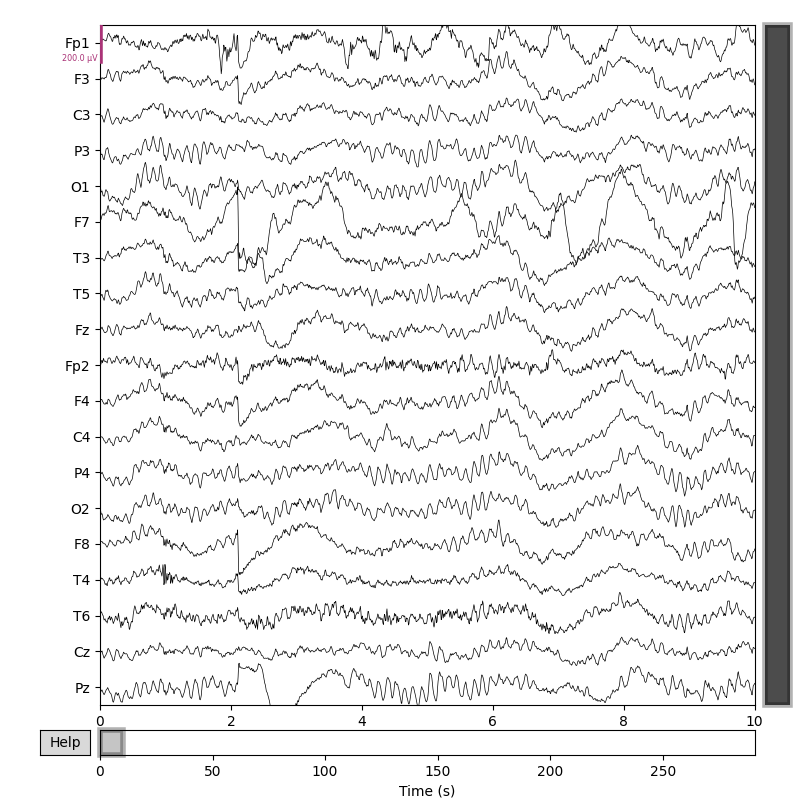

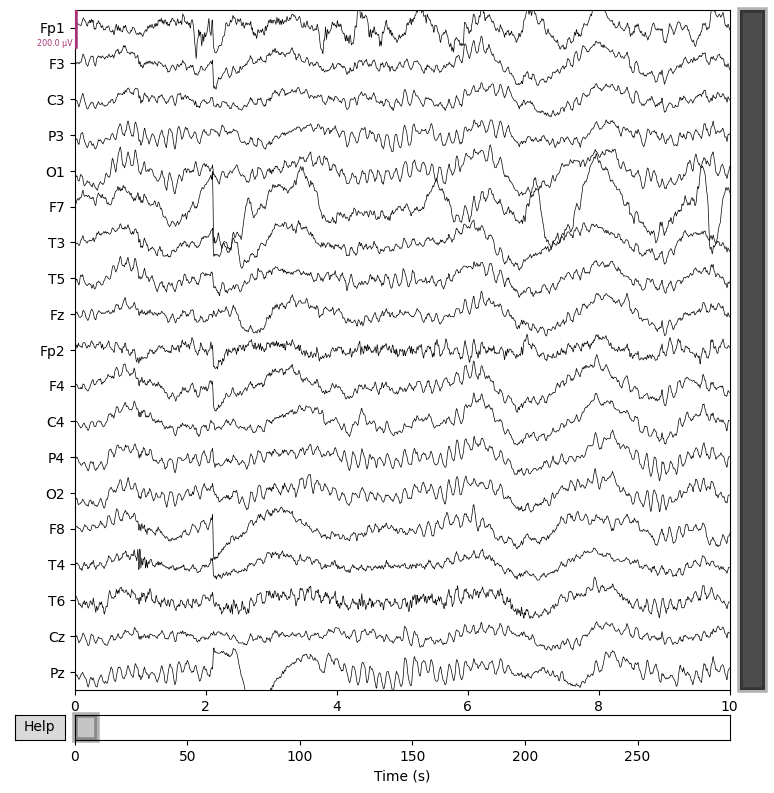

In [70]:
raw.plot(scalings={'eeg':10e-5})

In [73]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']